In [4]:
# Import Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import wordcloud as WordColud 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
fake=pd.read_csv("Fake.csv",encoding='Latin-1')
fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied Safe Zone Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [5]:
true = pd.read_csv('True.csv', error_bad_lines=False, encoding='latin-1')
true

b'Skipping line 11067: expected 4 fields, saw 8\n'


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21411,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21412,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21413,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21414,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [6]:
# Add a 'label' column to each DataFrame
fake['label'] = 0
true['label'] = 1

In [7]:
#Concatenate the two DataFrames to create a single dataset that contains both fake and true news articles.
combined_df = pd.concat([fake, true], ignore_index=True)

In [8]:
combined_df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44892,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44893,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44894,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44895,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


### Performing Data Preprocessing & EDA

In [7]:
print(combined_df.shape)  # Dimensions of the dataset

(44897, 5)


In [8]:
print(combined_df.head())  # First few rows of the dataset

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obamas Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0  


In [9]:
print(combined_df.info())  # General information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44897 entries, 0 to 44896
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44897 non-null  object
 1   text     44897 non-null  object
 2   subject  44897 non-null  object
 3   date     44897 non-null  object
 4   label    44897 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None


In [10]:
print(combined_df.describe())  # Summary statistics of numerical columns

              label
count  44897.000000
mean       0.477003
std        0.499476
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000


In [11]:
# Remove duplicates
#combined_df.drop_duplicates(subset=['title', 'text'], inplace=True)


In [12]:
# Handle missing values 
#combined_df.dropna(subset=['title', 'text'], inplace=True)

In [13]:
combined_df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44892,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44893,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44894,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44895,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


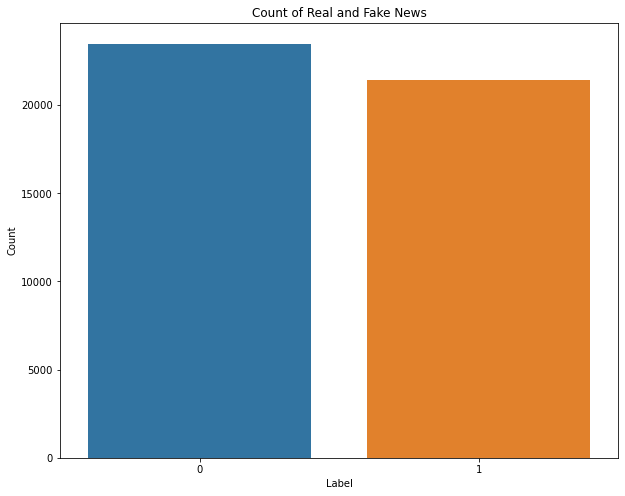

In [14]:
#Class Distribution
plt.figure(figsize=(10, 8))
sns.countplot(x='label', data=combined_df)
plt.title('Count of Real and Fake News')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

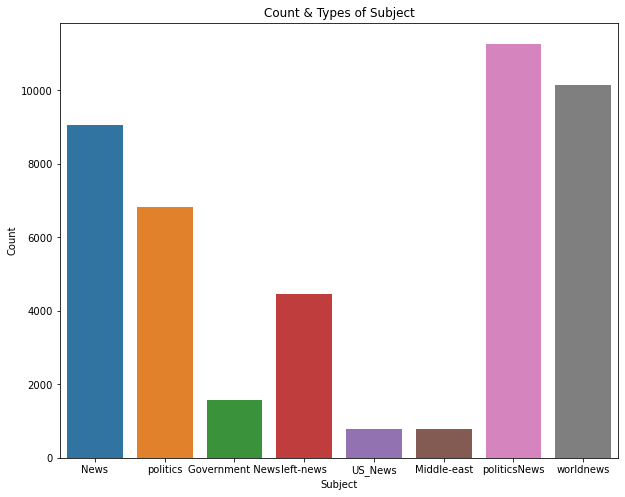

In [15]:
#Class Distribution
plt.figure(figsize=(10, 8))
sns.countplot(x='subject', data=combined_df)
plt.title('Count & Types of Subject')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.show()

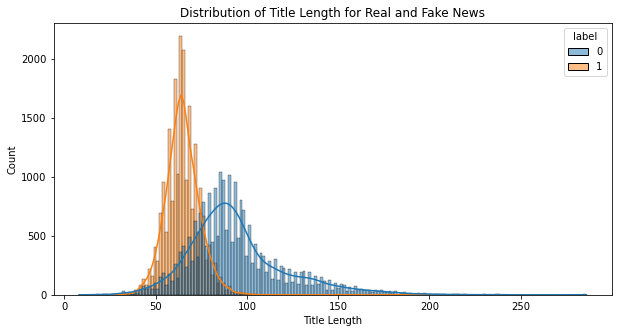

In [16]:
#Text Length Analysis
combined_df['title_len'] = combined_df['title'].apply(len)
plt.figure(figsize=(10, 5))
sns.histplot(data=combined_df, x='title_len', hue='label', kde=True)
plt.title('Distribution of Title Length for Real and Fake News')
plt.xlabel('Title Length')
plt.ylabel('Count')
plt.show()

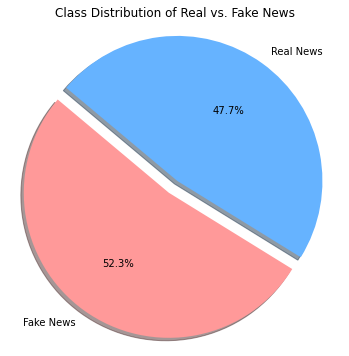

In [17]:
class_distribution = combined_df['label'].value_counts()
labels = ['Fake News', 'Real News']
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # Explode the first slice (Fake News) for emphasis

plt.figure(figsize=(6, 6))
plt.pie(class_distribution, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Class Distribution of Real vs. Fake News')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

In [18]:
#Word Frequency Analysis
#from wordcloud import WordCloud

#real_news = combined_df[combined_df['label'] == 1]
#real_news_text = ' '.join(real_news['title'])
#wordcloud = WordCloud(width=800, height=400, background_color='white').generate(real_news_text)
#plt.figure(figsize=(10, 5))
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.title('Word Cloud for Real News Titles')
#plt.axis('off')
#plt.show()

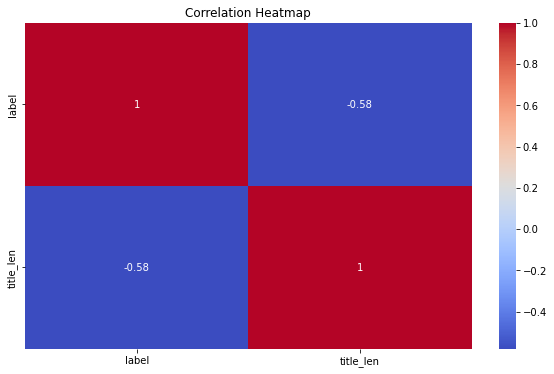

In [19]:
# Step 5: Correlations and Associations
plt.figure(figsize=(10, 6))
sns.heatmap(combined_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [20]:
# Filter out rows with invalid date values
combined_df = combined_df[combined_df['date'].str.contains('http') == False]

# Convert the 'date' column to datetime format
combined_df['date'] = pd.to_datetime(combined_df['date'], errors='coerce')


C:\Users\Sarth Naik\AppData\Local\Temp\ipykernel_13912\3141195484.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['date'] = pd.to_datetime(combined_df['date'], errors='coerce')


In [21]:
combined_df['date'] = pd.to_datetime(combined_df['date'])

C:\Users\Sarth Naik\AppData\Local\Temp\ipykernel_13912\756442684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['date'] = pd.to_datetime(combined_df['date'])


In [22]:
combined_df

,title,text,subject,date,label,title_len
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,0,79
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,0,69
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,0,90
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,0,78
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,0,70
...,...,...,...,...,...,...
44892,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22,1,61
44893,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22,1,52
44894,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22,1,49
44895,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22,1,61


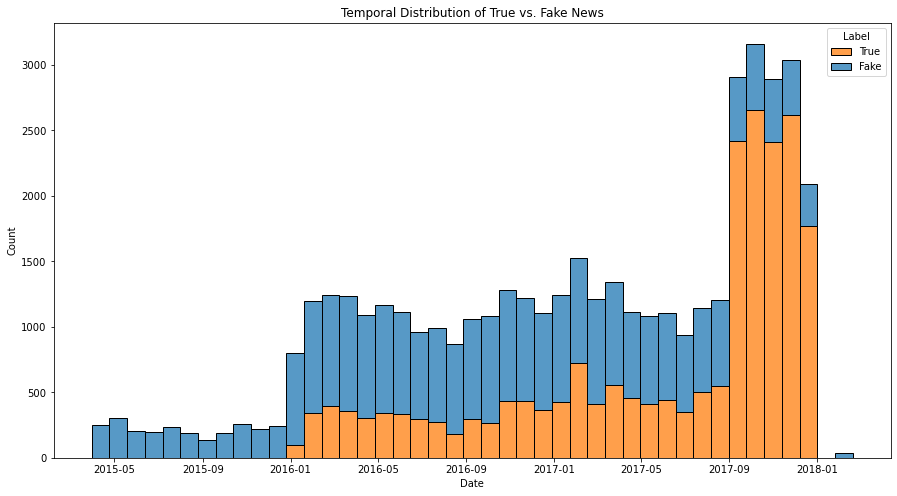

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.histplot(data=combined_df, x='date', hue='label', multiple='stack')
plt.title('Temporal Distribution of True vs. Fake News')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Label', labels=['True', 'Fake'])
plt.show()

We had analyze the distribution of news articles over time to see if there are any spikes, trends, or seasonality.

C:\Users\Sarth Naik\AppData\Local\Temp\ipykernel_13912\1566537398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['year'] = combined_df['date'].dt.year
C:\Users\Sarth Naik\AppData\Local\Temp\ipykernel_13912\1566537398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['month'] = combined_df['date'].dt.month


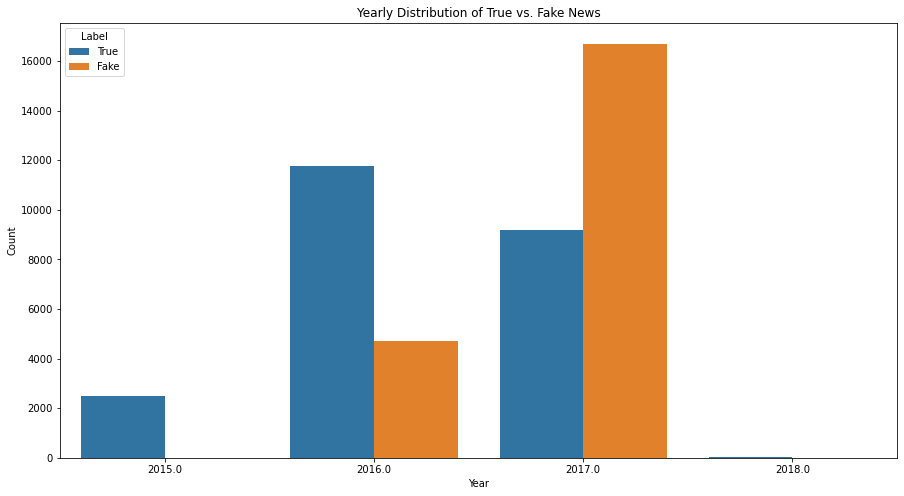

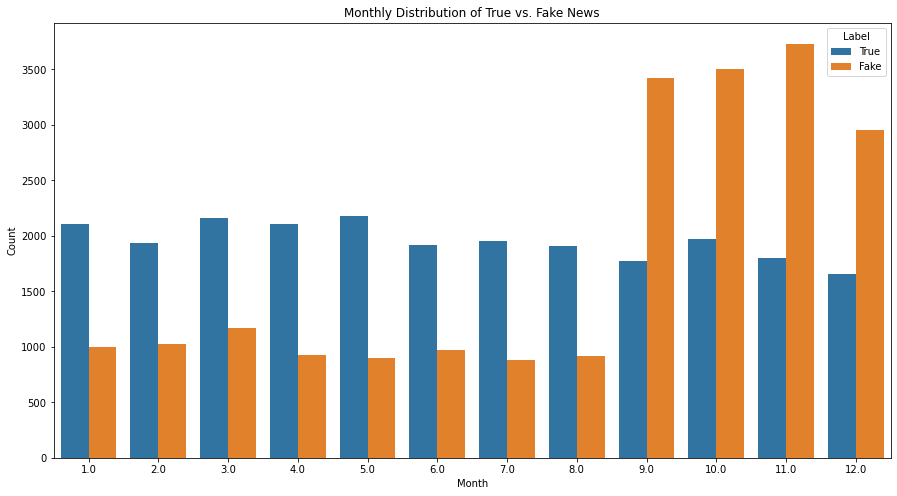

In [24]:
combined_df['year'] = combined_df['date'].dt.year
combined_df['month'] = combined_df['date'].dt.month

plt.figure(figsize=(15, 8))
sns.countplot(data=combined_df, x='year', hue='label')
plt.title('Yearly Distribution of True vs. Fake News')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Label', labels=['True', 'Fake'])
plt.show()

plt.figure(figsize=(15, 8))
sns.countplot(data=combined_df, x='month', hue='label')
plt.title('Monthly Distribution of True vs. Fake News')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Label', labels=['True', 'Fake'])
plt.show()

C:\Users\Sarth Naik\AppData\Local\Temp\ipykernel_13912\2432912894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['day_of_week'] = combined_df['date'].dt.day_name()


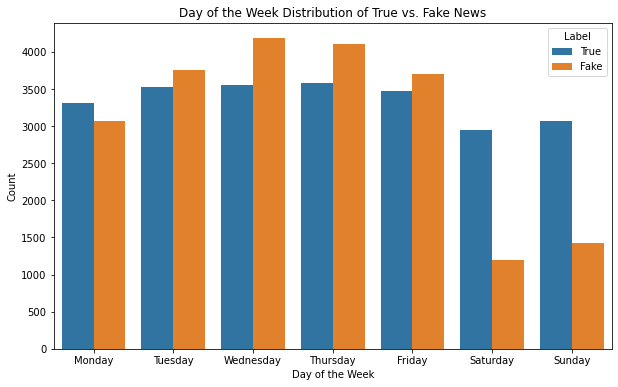

In [25]:
combined_df['day_of_week'] = combined_df['date'].dt.day_name()

plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='day_of_week', hue='label', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Day of the Week Distribution of True vs. Fake News')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='Label', labels=['True', 'Fake'])
plt.show()


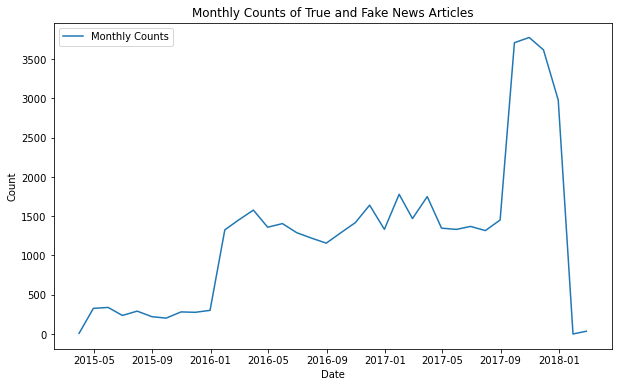

In [26]:
combined_df.set_index('date', inplace=True)
monthly_counts = combined_df['label'].resample('M').count()
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts, label='Monthly Counts')
plt.title('Monthly Counts of True and Fake News Articles')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

C:\Users\Sarth Naik\AppData\Local\Temp\ipykernel_13912\3023357485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['sentiment_score'] = combined_df['text'].apply(lambda x: sentiment_analyzer.polarity_scores(x)['compound'])
C:\Users\Sarth Naik\AppData\Local\Temp\ipykernel_13912\3023357485.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['sentiment_category'] = combined_df['sentiment_score'].apply(


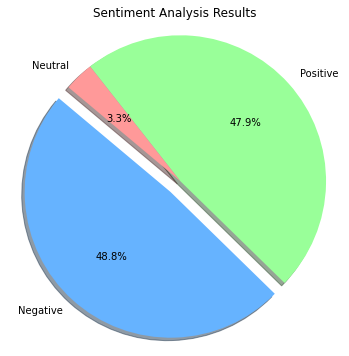

In [27]:
sentiment_analyzer = SentimentIntensityAnalyzer()
combined_df['sentiment_score'] = combined_df['text'].apply(lambda x: sentiment_analyzer.polarity_scores(x)['compound'])

# Categorize sentiment scores into sentiment categories
combined_df['sentiment_category'] = combined_df['sentiment_score'].apply(
    lambda score: 'Positive' if score >= 0.05 else ('Neutral' if -0.05 < score < 0.05 else 'Negative')
)

# Pie Plot for Sentiment Analysis
sentiment_distribution = combined_df['sentiment_category'].value_counts()
labels = sentiment_distribution.index
colors = ['#66b3ff', '#99ff99', '#ff9999']  # Blue for Positive, Green for Neutral, and Red for Negative
explode = (0.1, 0, 0)  # Explode the Positive slice for emphasis

plt.figure(figsize=(6, 6))
plt.pie(sentiment_distribution, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Sentiment Analysis Results')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

In [9]:
import nltk
nltk.download('vader_lexicon')
sentiment_analyzer = SentimentIntensityAnalyzer()
combined_df['sentiment_score'] = combined_df['text'].apply(lambda x: sentiment_analyzer.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\apoor\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
#Topic Modeling
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(combined_df['text'])
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
topics = lda_model.fit_transform(X)
combined_df['topic'] = topics.argmax(axis=1)


In [11]:
#Correlations
correlation_matrix = combined_df.corr()

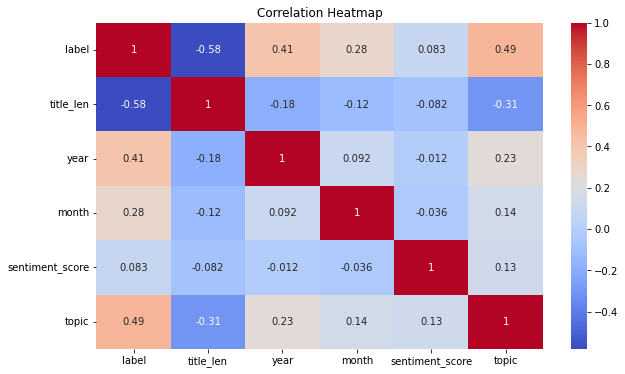

In [32]:
plt.figure(figsize=(10, 6))
sns.heatmap(combined_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

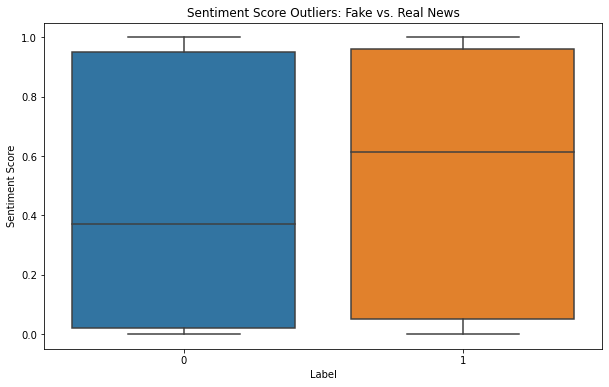

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='sentiment_score', data=combined_df)
plt.title('Sentiment Score Outliers: Fake vs. Real News')
plt.xlabel('Label')
plt.ylabel('Sentiment Score')
plt.show()

C:\Users\Sarth Naik\AppData\Local\Temp\ipykernel_13912\59961712.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['z_score'] = zscore(combined_df[numerical_features])
C:\Users\Sarth Naik\AppData\Local\Temp\ipykernel_13912\59961712.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['is_outlier'] = combined_df['z_score'].apply(lambda x: abs(x) > 3)


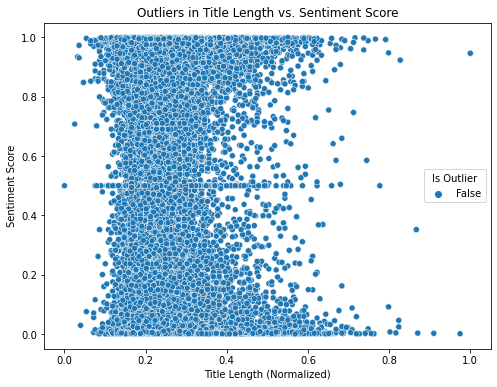

In [39]:
# Identify outliers using z-scores
from scipy.stats import zscore
numerical_features = ['sentiment_score']
combined_df['z_score'] = zscore(combined_df[numerical_features])
combined_df['is_outlier'] = combined_df['z_score'].apply(lambda x: abs(x) > 3)

# Visualize outliers
plt.figure(figsize=(8, 6))
sns.scatterplot(x='title_len', y='sentiment_score', hue='is_outlier', data=combined_df)
plt.title('Outliers in Title Length vs. Sentiment Score')
plt.xlabel('Title Length (Normalized)')
plt.ylabel('Sentiment Score')
plt.legend(title='Is Outlier')
plt.show()